<a href="https://colab.research.google.com/github/snowman74/Neural-Networks/blob/main/%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5%20%D1%81%D0%B5%D1%82%D0%B8%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F%20%D1%86%D0%B8%D1%84%D1%80%20mnist%20%D0%B8%20%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9%20cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# импортируем библиотеки
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import cifar100

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import math
import os
from google.colab import drive

%matplotlib inline

In [ ]:
from tensorflow.keras.layers import AveragePooling2D

Распознавание рукописных цифр с помощью сверточных сетей


In [ ]:
# download MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

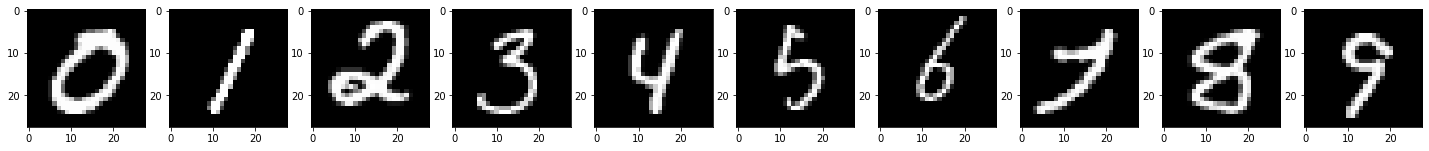

In [ ]:
fig, axs = plt.subplots(1, 10, figsize=(25,3))
for i in range(10):
  label_indexes = np.where(y_train==i)[0]
  index = random.choice(label_indexes)
  img = x_train[index]
  axs[i].imshow(Image.fromarray(img), cmap='gray')

In [ ]:
# normalization datasets
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


Epoch 1/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1605 - accuracy: 0.9509 - val_loss: 0.0408 - val_accuracy: 0.9863
Epoch 2/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0539 - accuracy: 0.9838 - val_loss: 0.0387 - val_accuracy: 0.9863
Epoch 3/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0350 - accuracy: 0.9888 - val_loss: 0.0389 - val_accuracy: 0.9873
Epoch 4/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0282 - accuracy: 0.9907 - val_loss: 0.0343 - val_accuracy: 0.9885
Epoch 5/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0223 - accuracy: 0.9926 - val_loss: 0.0289 - val_accuracy: 0.9914
Epoch 6/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0183 - accuracy: 0.9940 - val_loss: 0.0267 - val_accuracy: 0.9917
Epoch 7/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0157 - accuracy: 0.9946 - val_loss: 0.0345 - val_accuracy: 0.9904
Epoch 

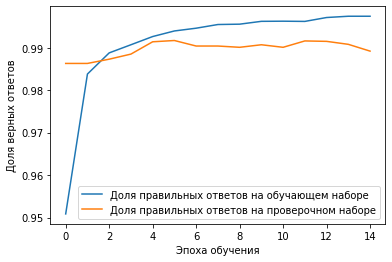

In [ ]:
# create CNN
batch_size = 128

model = Sequential()
model.add(BatchNormalization(input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3,), padding='same', activation='relu'))
model.add(Conv2D(32, (3,3,), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

In [ ]:
n = random.randint(0, x_test.shape[0])
prediction = model.predict(x_test)

print('пример номер: ', n)
print('Выход сети: ', prediction[n])
print('Распознанная цифра: ', np.argmax(prediction[n]))
print('Верный ответ: ', np.argmax(y_test[n]))

пример номер:  7493
Выход сети:  [3.7187870e-14 1.9032376e-09 3.3369238e-09 2.7340980e-06 5.6139534e-14
 3.3859959e-13 2.1002680e-17 9.9999678e-01 6.1514026e-14 4.9228152e-07]
Распознанная цифра:  7
Верный ответ:  7


In [ ]:
!unzip '/content/drive/My Drive/Базы/digits.zip'

Archive:  /content/drive/My Drive/Базы/digits.zip
   creating: digits/
  inflating: digits/0.png            
  inflating: digits/1.png            
  inflating: digits/2.png            
  inflating: digits/3.png            
  inflating: digits/4.png            
  inflating: digits/5.png            
  inflating: digits/6.png            
  inflating: digits/7.png            
  inflating: digits/8.png            
  inflating: digits/9.png            


In [ ]:
def change_contrast(img, factor):
  def contrast(pixel):
    return 128 + factor * (pixel - 128)
  return img.point(contrast)

xTestReal = []
yTestReal = []

for i in range(10):
  img_path = 'digits/' + str(i) + '.png'
  img = image.load_img(img_path, grayscale=True, target_size=(28,28))
  img1 = change_contrast(img, factor=5.0)
  xTestReal.append(255 - np.asarray(img1))
  yTestReal.append(i)

xTestReal = np.array(xTestReal)
yTestReal = np.array(yTestReal)


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


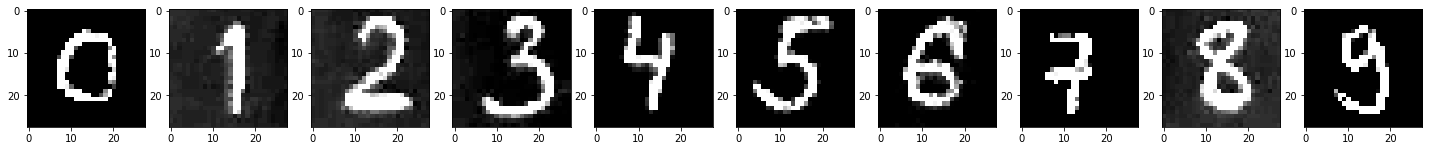

In [ ]:
fig, axs = plt.subplots(1, 10, figsize=(25,3))
for i in range(10):
  axs[i].imshow(Image.fromarray(xTestReal[i]), cmap='gray')

plt.show()

In [ ]:
xTestReal = xTestReal.reshape(xTestReal.shape[0], 28, 28, 1)

In [ ]:
prediction = model.predict(xTestReal)
for i in range(10):
  print('Распознанный образ', np.argmax(prediction[i]), '. Верный ответ', yTestReal[i])

Распознанный образ 0 . Верный ответ 0
Распознанный образ 1 . Верный ответ 1
Распознанный образ 2 . Верный ответ 2
Распознанный образ 3 . Верный ответ 3
Распознанный образ 4 . Верный ответ 4
Распознанный образ 5 . Верный ответ 5
Распознанный образ 6 . Верный ответ 6
Распознанный образ 7 . Верный ответ 7
Распознанный образ 8 . Верный ответ 8
Распознанный образ 9 . Верный ответ 9


Попробуем поиграть с гиперпараметрами

Epoch 1/15
469/469 [==============================] - 2s 3ms/step - loss: 0.4569 - accuracy: 0.8551 - val_loss: 0.1562 - val_accuracy: 0.9509
Epoch 2/15
469/469 [==============================] - 1s 3ms/step - loss: 0.2458 - accuracy: 0.9225 - val_loss: 0.1165 - val_accuracy: 0.9646
Epoch 3/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1966 - accuracy: 0.9380 - val_loss: 0.1078 - val_accuracy: 0.9653
Epoch 4/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1688 - accuracy: 0.9461 - val_loss: 0.0890 - val_accuracy: 0.9711
Epoch 5/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1571 - accuracy: 0.9504 - val_loss: 0.0852 - val_accuracy: 0.9732
Epoch 6/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1394 - accuracy: 0.9553 - val_loss: 0.0797 - val_accuracy: 0.9729
Epoch 7/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1321 - accuracy: 0.9566 - val_loss: 0.0731 - val_accuracy: 0.9772
Epoch 

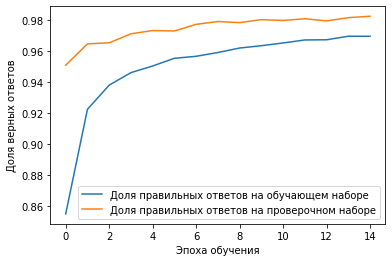

In [ ]:
# один слой в 2 нейрона в сверточных слоях
# create CNN
batch_size = 128

model_1 = Sequential()
model_1.add(BatchNormalization(input_shape=(28,28,1)))
model_1.add(Conv2D(2, (3,3,), padding='same', activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))

model_1.add(Flatten())
model_1.add(Dense(256, activation='relu'))
model_1.add(Dropout(0.25))
model_1.add(Dense(10, activation='softmax'))

model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_1 = model_1.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

plt.plot(history_1.history['accuracy'], 
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history_1.history['val_accuracy'], 
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/15
469/469 [==============================] - 2s 3ms/step - loss: 0.5105 - accuracy: 0.8375 - val_loss: 0.1789 - val_accuracy: 0.9440
Epoch 2/15
469/469 [==============================] - 1s 3ms/step - loss: 0.2553 - accuracy: 0.9196 - val_loss: 0.1298 - val_accuracy: 0.9598
Epoch 3/15
469/469 [==============================] - 1s 3ms/step - loss: 0.2013 - accuracy: 0.9361 - val_loss: 0.1043 - val_accuracy: 0.9676
Epoch 4/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1739 - accuracy: 0.9446 - val_loss: 0.0936 - val_accuracy: 0.9705
Epoch 5/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1544 - accuracy: 0.9507 - val_loss: 0.0891 - val_accuracy: 0.9707
Epoch 6/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1401 - accuracy: 0.9547 - val_loss: 0.0754 - val_accuracy: 0.9757
Epoch 7/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1301 - accuracy: 0.9566 - val_loss: 0.0793 - val_accuracy: 0.9745
Epoch 

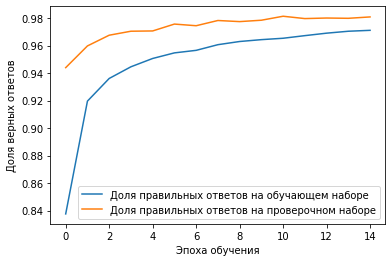

In [ ]:
# один слой 4 нейрона
# по одному слою в сверточных слоях
# create CNN
batch_size = 128

model_2 = Sequential()
model_2.add(BatchNormalization(input_shape=(28,28,1)))
model_2.add(Conv2D(2, (3,3,), padding='same', activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(256, activation='relu'))
model_2.add(Dropout(0.25))
model_2.add(Dense(10, activation='softmax'))

model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_2 = model_2.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

plt.plot(history_2.history['accuracy'], 
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history_2.history['val_accuracy'], 
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2439 - accuracy: 0.9244 - val_loss: 0.0743 - val_accuracy: 0.9767
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0930 - accuracy: 0.9707 - val_loss: 0.0517 - val_accuracy: 0.9826
Epoch 3/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0673 - accuracy: 0.9783 - val_loss: 0.0455 - val_accuracy: 0.9836
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0522 - accuracy: 0.9834 - val_loss: 0.0380 - val_accuracy: 0.9867
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0436 - accuracy: 0.9862 - val_loss: 0.0350 - val_accuracy: 0.9890
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0367 - accuracy: 0.9877 - val_loss: 0.0344 - val_accuracy: 0.9884
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0287 - accuracy: 0.9907 - val_loss: 0.0346 - val_accuracy: 0.9876
Epoch 

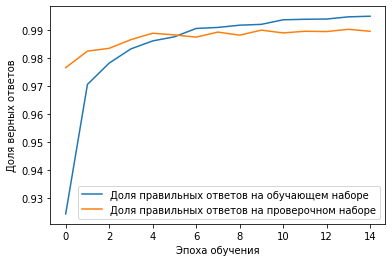

In [ ]:
# один слой 16 нейронов
# по одному слою в сверточных слоях
# create CNN
batch_size = 128

model_3 = Sequential()
model_3.add(BatchNormalization(input_shape=(28,28,1)))
model_3.add(Conv2D(16, (3,3,), padding='same', activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())
model_3.add(Dense(256, activation='relu'))
model_3.add(Dropout(0.25))
model_3.add(Dense(10, activation='softmax'))

model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_3 = model_3.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

plt.plot(history_3.history['accuracy'], 
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history_3.history['val_accuracy'], 
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/15
469/469 [==============================] - 3s 7ms/step - loss: 0.2035 - accuracy: 0.9387 - val_loss: 0.0901 - val_accuracy: 0.9713
Epoch 2/15
469/469 [==============================] - 3s 6ms/step - loss: 0.1009 - accuracy: 0.9688 - val_loss: 0.0829 - val_accuracy: 0.9749
Epoch 3/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0850 - accuracy: 0.9738 - val_loss: 0.0716 - val_accuracy: 0.9769
Epoch 4/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0764 - accuracy: 0.9754 - val_loss: 0.0793 - val_accuracy: 0.9755
Epoch 5/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0689 - accuracy: 0.9785 - val_loss: 0.0741 - val_accuracy: 0.9778
Epoch 6/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0652 - accuracy: 0.9788 - val_loss: 0.0787 - val_accuracy: 0.9760
Epoch 7/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0633 - accuracy: 0.9794 - val_loss: 0.0717 - val_accuracy: 0.9786
Epoch 

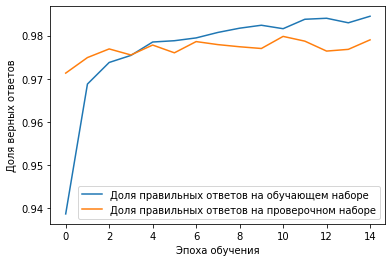

In [ ]:
# поменяли relu на linear
# create CNN
batch_size = 128

model_4 = Sequential()
model_4.add(BatchNormalization(input_shape=(28,28,1)))
model_4.add(Conv2D(32, (3,3,), padding='same', activation='linear'))
model_4.add(Conv2D(32, (3,3,), padding='same', activation='linear'))
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.25))

model_4.add(Flatten())
model_4.add(Dense(256, activation='linear'))
model_4.add(Dropout(0.25))
model_4.add(Dense(10, activation='softmax'))

model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_4 = model_4.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

plt.plot(history_4.history['accuracy'], 
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history_4.history['val_accuracy'], 
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/15
6000/6000 [==============================] - 17s 3ms/step - loss: 0.1210 - accuracy: 0.9636 - val_loss: 0.0407 - val_accuracy: 0.9868
Epoch 2/15
6000/6000 [==============================] - 17s 3ms/step - loss: 0.0520 - accuracy: 0.9844 - val_loss: 0.0347 - val_accuracy: 0.9892
Epoch 3/15
6000/6000 [==============================] - 17s 3ms/step - loss: 0.0384 - accuracy: 0.9880 - val_loss: 0.0320 - val_accuracy: 0.9879
Epoch 4/15
6000/6000 [==============================] - 17s 3ms/step - loss: 0.0281 - accuracy: 0.9909 - val_loss: 0.0283 - val_accuracy: 0.9895
Epoch 5/15
6000/6000 [==============================] - 18s 3ms/step - loss: 0.0222 - accuracy: 0.9930 - val_loss: 0.0256 - val_accuracy: 0.9926
Epoch 6/15
6000/6000 [==============================] - 17s 3ms/step - loss: 0.0180 - accuracy: 0.9944 - val_loss: 0.0287 - val_accuracy: 0.9918
Epoch 7/15
6000/6000 [==============================] - 17s 3ms/step - loss: 0.0165 - accuracy: 0.9944 - val_loss: 0.0315 - val_ac

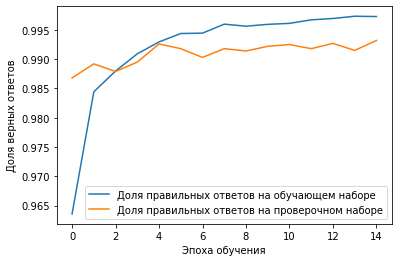

In [ ]:
# размер batch = 10
# create CNN
batch_size = 10

model_5 = Sequential()
model_5.add(BatchNormalization(input_shape=(28,28,1)))
model_5.add(Conv2D(32, (3,3,), padding='same', activation='relu'))
model_5.add(Conv2D(32, (3,3,), padding='same', activation='relu'))
model_5.add(MaxPooling2D(pool_size=(2,2)))
model_5.add(Dropout(0.25))

model_5.add(Flatten())
model_5.add(Dense(256, activation='relu'))
model_5.add(Dropout(0.25))
model_5.add(Dense(10, activation='softmax'))

model_5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_5 = model_5.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

plt.plot(history_5.history['accuracy'], 
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history_5.history['val_accuracy'], 
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/15
600/600 [==============================] - 3s 6ms/step - loss: 0.1519 - accuracy: 0.9529 - val_loss: 0.0416 - val_accuracy: 0.9871
Epoch 2/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0499 - accuracy: 0.9847 - val_loss: 0.0343 - val_accuracy: 0.9878
Epoch 3/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0340 - accuracy: 0.9892 - val_loss: 0.0290 - val_accuracy: 0.9905
Epoch 4/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0275 - accuracy: 0.9912 - val_loss: 0.0313 - val_accuracy: 0.9891
Epoch 5/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0213 - accuracy: 0.9932 - val_loss: 0.0288 - val_accuracy: 0.9909
Epoch 6/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0181 - accuracy: 0.9941 - val_loss: 0.0347 - val_accuracy: 0.9896
Epoch 7/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0156 - accuracy: 0.9948 - val_loss: 0.0347 - val_accuracy: 0.9903
Epoch 

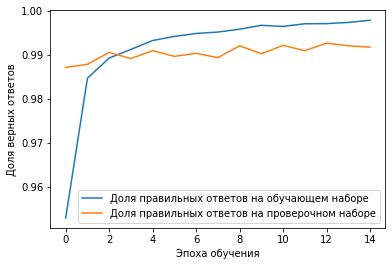

In [ ]:
# размер batch = 100
# create CNN
batch_size = 100

model_6 = Sequential()
model_6.add(BatchNormalization(input_shape=(28,28,1)))
model_6.add(Conv2D(32, (3,3,), padding='same', activation='relu'))
model_6.add(Conv2D(32, (3,3,), padding='same', activation='relu'))
model_6.add(MaxPooling2D(pool_size=(2,2)))
model_6.add(Dropout(0.25))

model_6.add(Flatten())
model_6.add(Dense(256, activation='relu'))
model_6.add(Dropout(0.25))
model_6.add(Dense(10, activation='softmax'))

model_6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_6 = model_6.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

plt.plot(history_6.history['accuracy'], 
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history_6.history['val_accuracy'], 
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

НА РАЗМЕР BACTCH_SIZE=48000 GOOGLE-COLAB РУГАЛСЯ СЛЕДУЮЩИМ МАТОМ, РАЗМЕР ПОСТАВИЛ МЕНЬШИЙ


ResourceExhaustedError:  OOM when allocating tensor with shape[48000,32,14,14] and type bool on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_15/dropout_28/dropout/ArithmeticOptimizer/ReorderCastLikeAndValuePreserving_bool_Mul_1-0-TransposeNHWCToNCHW-LayoutOptimizer}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_613198]

Function call stack:
train_function


Epoch 1/15
3/3 [==============================] - 3s 1s/step - loss: 2.0993 - accuracy: 0.2961 - val_loss: 0.9235 - val_accuracy: 0.7280
Epoch 2/15
3/3 [==============================] - 2s 622ms/step - loss: 1.0833 - accuracy: 0.7486 - val_loss: 1.2688 - val_accuracy: 0.7685
Epoch 3/15
3/3 [==============================] - 2s 621ms/step - loss: 0.6003 - accuracy: 0.8096 - val_loss: 1.3981 - val_accuracy: 0.8069
Epoch 4/15
3/3 [==============================] - 2s 624ms/step - loss: 0.4801 - accuracy: 0.8526 - val_loss: 1.2753 - val_accuracy: 0.8388
Epoch 5/15
3/3 [==============================] - 2s 626ms/step - loss: 0.4087 - accuracy: 0.8807 - val_loss: 0.9266 - val_accuracy: 0.8689
Epoch 6/15
3/3 [==============================] - 2s 624ms/step - loss: 0.3492 - accuracy: 0.8974 - val_loss: 0.6646 - val_accuracy: 0.8890
Epoch 7/15
3/3 [==============================] - 2s 630ms/step - loss: 0.2964 - accuracy: 0.9119 - val_loss: 0.4927 - val_accuracy: 0.9051
Epoch 8/15
3/3 [=======

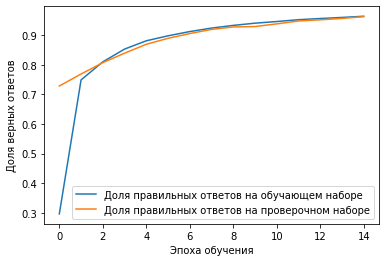

In [ ]:
# размер batch = 24000
# create CNN
batch_size = 24000

model_7 = Sequential()
model_7.add(BatchNormalization(input_shape=(28,28,1)))
model_7.add(Conv2D(32, (3,3,), padding='same', activation='relu'))
model_7.add(Conv2D(32, (3,3,), padding='same', activation='relu'))
model_7.add(MaxPooling2D(pool_size=(2,2)))
model_7.add(Dropout(0.25))

model_7.add(Flatten())
model_7.add(Dense(256, activation='relu'))
model_7.add(Dropout(0.25))
model_7.add(Dense(10, activation='softmax'))

model_7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_7 = model_7.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

plt.plot(history_7.history['accuracy'], 
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history_7.history['val_accuracy'], 
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/15
469/469 [==============================] - 2s 5ms/step - loss: 0.2027 - accuracy: 0.9369 - val_loss: 0.0835 - val_accuracy: 0.9723
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0763 - accuracy: 0.9763 - val_loss: 0.0573 - val_accuracy: 0.9811
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0515 - accuracy: 0.9834 - val_loss: 0.0459 - val_accuracy: 0.9853
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0412 - accuracy: 0.9865 - val_loss: 0.0364 - val_accuracy: 0.9871
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0345 - accuracy: 0.9888 - val_loss: 0.0379 - val_accuracy: 0.9871
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0261 - accuracy: 0.9911 - val_loss: 0.0318 - val_accuracy: 0.9894
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0237 - accuracy: 0.9921 - val_loss: 0.0352 - val_accuracy: 0.9890
Epoch 

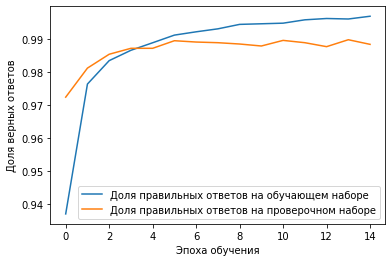

In [ ]:
# один слой в 32 нейрона в сверточных слоях
# create CNN
batch_size = 128

model_8 = Sequential()
model_8.add(BatchNormalization(input_shape=(28,28,1)))
model_8.add(Conv2D(32, (3,3,), padding='same', activation='relu'))
model_8.add(MaxPooling2D(pool_size=(2,2)))
model_8.add(Dropout(0.25))

model_8.add(Flatten())
model_8.add(Dense(256, activation='relu'))
model_8.add(Dropout(0.25))
model_8.add(Dense(10, activation='softmax'))

model_8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_8 = model_8.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

plt.plot(history_8.history['accuracy'], 
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history_8.history['val_accuracy'], 
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

In [ ]:
res = pd.DataFrame({'model': {'точность на обучающем наборе': history.history['accuracy'][-1], 
                              'точность на проверочном наборе': history.history['val_accuracy'][-1]}})

res['один слой в 2 нейрона'] = [history_1.history['accuracy'][-1], history_1.history['val_accuracy'][-1]]
res['один слой в 4 нейрона'] = [history_2.history['accuracy'][-1], history_2.history['val_accuracy'][-1]]
res['один слой в 16 нейрона'] = [history_3.history['accuracy'][-1], history_3.history['val_accuracy'][-1]]
res['один слой в 32 нейрона'] = [history_8.history['accuracy'][-1], history_8.history['val_accuracy'][-1]]
res['relu_to_linear'] = [history_4.history['accuracy'][-1], history_4.history['val_accuracy'][-1]]
res['batch_size=10'] = [history_5.history['accuracy'][-1], history_5.history['val_accuracy'][-1]]
res['batch_size=100'] = [history_6.history['accuracy'][-1], history_6.history['val_accuracy'][-1]]
res['batch_size=24000'] = [history_7.history['accuracy'][-1], history_7.history['val_accuracy'][-1]]


In [ ]:
res

,model,один слой в 2 нейрона,один слой в 4 нейрона,один слой в 16 нейрона,один слой в 32 нейрона,relu_to_linear,batch_size=10,batch_size=100,batch_size=24000
точность на обучающем наборе,0.997417,0.9695,0.97115,0.995067,0.996817,0.984467,0.997283,0.9978,0.963583
точность на проверочном наборе,0.989200,0.9824,0.98090,0.989700,0.988300,0.979000,0.993200,0.9917,0.962100


Количество нейронов в слое

Из таблицы видно, что одна из самых высоких точностей на проверочной (а заодно и на тренировочной) выборке достигнута на модели с занятия (а там было, на минуточку, 32 нейрона на каждом из двух слоев. При использовании одного слоя - точность меньше, причем она растёт при увеличении количества нейронов в нем, однако разница на данном наборе становится ничтожной при увеличении количества нейронов до 16 (всего 0.09%), а это можно списать на различные начальные веса при инициализации модели. Следовательно один слой в 16 нейронов работает ни хуже, чем два слоя по 32, и, если есть потребность в увеличении скорости работы, то  имеет смысл применить вариант с одним слоем из 16 нейронов.


Изменение функции активации на linear - понизило точность на 1.13%. Вывод - по крайней мере с этой архитектурой лучше использовать relu


batch_size

Изменение размеров бач_сайза  на меньший (относительно модели занятия) дало прирост в точности, однако чем меньше бач_сайз - тем дольше обучение, а следовательно и работа, оптимальный вариант размера бач_сайза для этого случая - 100

**Попробуем добиться точности 85% (в идеале 90%) на проверочной выборке на базе Cifar10. Размер проверочной выборки - 20%.**


In [ ]:
(x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()

In [ ]:
classes = ['самолет', 'автомобиль', 'птица','кот','олень','собака','лягушка','лошадь','корабль','грузовик']

In [ ]:
y_train10 = utils.to_categorical(y_train10, 10)
y_test10 = utils.to_categorical(y_test10, 10)

Epoch 1/20
313/313 [==============================] - 5s 14ms/step - loss: 1.5755 - accuracy: 0.4224 - val_loss: 1.8223 - val_accuracy: 0.3617
Epoch 2/20
313/313 [==============================] - 4s 13ms/step - loss: 1.1330 - accuracy: 0.5949 - val_loss: 0.9651 - val_accuracy: 0.6578
Epoch 3/20
313/313 [==============================] - 4s 13ms/step - loss: 0.9492 - accuracy: 0.6668 - val_loss: 0.8300 - val_accuracy: 0.7062
Epoch 4/20
313/313 [==============================] - 4s 13ms/step - loss: 0.8382 - accuracy: 0.7048 - val_loss: 0.7781 - val_accuracy: 0.7196
Epoch 5/20
313/313 [==============================] - 4s 13ms/step - loss: 0.7677 - accuracy: 0.7303 - val_loss: 0.6936 - val_accuracy: 0.7603
Epoch 6/20
313/313 [==============================] - 4s 13ms/step - loss: 0.7038 - accuracy: 0.7495 - val_loss: 0.6661 - val_accuracy: 0.7680
Epoch 7/20
313/313 [==============================] - 4s 13ms/step - loss: 0.6608 - accuracy: 0.7671 - val_loss: 0.6582 - val_accuracy: 0.7728

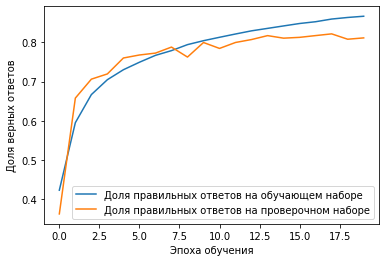

In [ ]:
batch_size = 128

model_pro2 = Sequential()
model_pro2.add(BatchNormalization(input_shape=(32,32,3)))
model_pro2.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model_pro2.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model_pro2.add(MaxPooling2D(pool_size=(2,2)))
model_pro2.add(Dropout(0.25))

model_pro2.add(BatchNormalization())
model_pro2.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model_pro2.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model_pro2.add(MaxPooling2D(pool_size=(2,2)))
model_pro2.add(Dropout(0.25))

model_pro2.add(BatchNormalization())
model_pro2.add(Conv2D(128, (3,3,), padding='same', activation='relu'))
model_pro2.add(Conv2D(128, (3,3,), padding='same', activation='relu'))
model_pro2.add(MaxPooling2D(pool_size=(2,2)))
model_pro2.add(Dropout(0.25))


model_pro2.add(Flatten())
model_pro2.add(Dense(512, activation='relu'))
model_pro2.add(Dropout(0.25))
model_pro2.add(Dense(10, activation='softmax'))

model_pro2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_pro2 = model_pro2.fit(x_train10,
                              y_train10,
                              batch_size=batch_size,
                              epochs=20,
                              validation_split=0.2,
                              verbose=1)

plt.plot(history_pro2.history['accuracy'], 
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history_pro2.history['val_accuracy'], 
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/40
313/313 [==============================] - 4s 14ms/step - loss: 1.5257 - accuracy: 0.4450 - val_loss: 2.0436 - val_accuracy: 0.3576
Epoch 2/40
313/313 [==============================] - 4s 13ms/step - loss: 1.0962 - accuracy: 0.6094 - val_loss: 0.9658 - val_accuracy: 0.6562
Epoch 3/40
313/313 [==============================] - 4s 13ms/step - loss: 0.9332 - accuracy: 0.6705 - val_loss: 0.8740 - val_accuracy: 0.6884
Epoch 4/40
313/313 [==============================] - 4s 13ms/step - loss: 0.8178 - accuracy: 0.7112 - val_loss: 0.7538 - val_accuracy: 0.7381
Epoch 5/40
313/313 [==============================] - 4s 13ms/step - loss: 0.7486 - accuracy: 0.7358 - val_loss: 0.7074 - val_accuracy: 0.7530
Epoch 6/40
313/313 [==============================] - 4s 13ms/step - loss: 0.6875 - accuracy: 0.7570 - val_loss: 0.6664 - val_accuracy: 0.7678
Epoch 7/40
313/313 [==============================] - 4s 13ms/step - loss: 0.6418 - accuracy: 0.7732 - val_loss: 0.6277 - val_accuracy: 0.7850

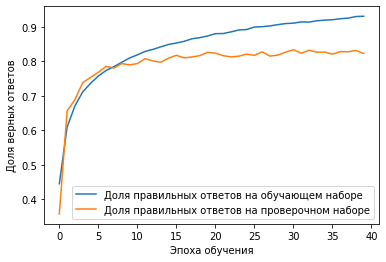

In [ ]:
# попробуем увеличить число эпох
batch_size = 128

model_pro2 = Sequential()
model_pro2.add(BatchNormalization(input_shape=(32,32,3)))
model_pro2.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model_pro2.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model_pro2.add(MaxPooling2D(pool_size=(2,2)))
model_pro2.add(Dropout(0.25))

model_pro2.add(BatchNormalization())
model_pro2.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model_pro2.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model_pro2.add(MaxPooling2D(pool_size=(2,2)))
model_pro2.add(Dropout(0.25))

model_pro2.add(BatchNormalization())
model_pro2.add(Conv2D(128, (3,3,), padding='same', activation='relu'))
model_pro2.add(Conv2D(128, (3,3,), padding='same', activation='relu'))
model_pro2.add(MaxPooling2D(pool_size=(2,2)))
model_pro2.add(Dropout(0.25))


model_pro2.add(Flatten())
model_pro2.add(Dense(512, activation='relu'))
model_pro2.add(Dropout(0.25))
model_pro2.add(Dense(10, activation='softmax'))

model_pro2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_pro2 = model_pro2.fit(x_train10,
                              y_train10,
                              batch_size=batch_size,
                              epochs=40,
                              validation_split=0.2,
                              verbose=1)

plt.plot(history_pro2.history['accuracy'], 
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history_pro2.history['val_accuracy'], 
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/40
313/313 [==============================] - 8s 26ms/step - loss: 1.5603 - accuracy: 0.4282 - val_loss: 1.3543 - val_accuracy: 0.5196
Epoch 2/40
313/313 [==============================] - 8s 25ms/step - loss: 1.1200 - accuracy: 0.5978 - val_loss: 1.0140 - val_accuracy: 0.6431
Epoch 3/40
313/313 [==============================] - 8s 25ms/step - loss: 0.9323 - accuracy: 0.6682 - val_loss: 0.8196 - val_accuracy: 0.7094
Epoch 4/40
313/313 [==============================] - 8s 26ms/step - loss: 0.8225 - accuracy: 0.7097 - val_loss: 0.7135 - val_accuracy: 0.7496
Epoch 5/40
313/313 [==============================] - 8s 26ms/step - loss: 0.7373 - accuracy: 0.7422 - val_loss: 0.8477 - val_accuracy: 0.7135
Epoch 6/40
313/313 [==============================] - 8s 26ms/step - loss: 0.6732 - accuracy: 0.7620 - val_loss: 0.6953 - val_accuracy: 0.7647
Epoch 7/40
313/313 [==============================] - 8s 25ms/step - loss: 0.6241 - accuracy: 0.7817 - val_loss: 0.6566 - val_accuracy: 0.7757

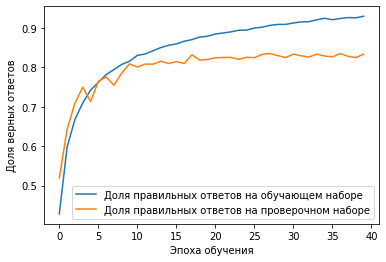

In [ ]:
# как видим - точность растёт лишь на обучающей выборке, что тоже (наверное) неплохо,
# попробуем изменить размер ядер в сверточных слоях
batch_size = 128

model_pro2 = Sequential()
model_pro2.add(BatchNormalization(input_shape=(32,32,3)))
model_pro2.add(Conv2D(32, (4,4), padding='same', activation='relu'))
model_pro2.add(Conv2D(32, (4,4), padding='same', activation='relu'))
model_pro2.add(MaxPooling2D(pool_size=(2,2)))
model_pro2.add(Dropout(0.25))

model_pro2.add(BatchNormalization())
model_pro2.add(Conv2D(64, (4,4), padding='same', activation='relu'))
model_pro2.add(Conv2D(64, (4,4), padding='same', activation='relu'))
model_pro2.add(MaxPooling2D(pool_size=(2,2)))
model_pro2.add(Dropout(0.25))

model_pro2.add(BatchNormalization())
model_pro2.add(Conv2D(128, (4,4), padding='same', activation='relu'))
model_pro2.add(Conv2D(128, (4,4), padding='same', activation='relu'))
model_pro2.add(MaxPooling2D(pool_size=(2,2)))
model_pro2.add(Dropout(0.25))


model_pro2.add(Flatten())
model_pro2.add(Dense(512, activation='relu'))
model_pro2.add(Dropout(0.25))
model_pro2.add(Dense(10, activation='softmax'))

model_pro2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_pro2 = model_pro2.fit(x_train10,
                              y_train10,
                              batch_size=batch_size,
                              epochs=40,
                              validation_split=0.2,
                              verbose=1)

plt.plot(history_pro2.history['accuracy'], 
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history_pro2.history['val_accuracy'], 
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/55
1334/1334 [==============================] - 10s 7ms/step - loss: 1.5093 - accuracy: 0.4477 - val_loss: 1.1354 - val_accuracy: 0.5887
Epoch 2/55
1334/1334 [==============================] - 10s 7ms/step - loss: 1.0979 - accuracy: 0.6119 - val_loss: 0.9271 - val_accuracy: 0.6762
Epoch 3/55
1334/1334 [==============================] - 10s 7ms/step - loss: 0.9217 - accuracy: 0.6789 - val_loss: 0.8141 - val_accuracy: 0.7185
Epoch 4/55
1334/1334 [==============================] - 10s 7ms/step - loss: 0.8156 - accuracy: 0.7200 - val_loss: 0.7569 - val_accuracy: 0.7422
Epoch 5/55
1334/1334 [==============================] - 10s 7ms/step - loss: 0.7442 - accuracy: 0.7436 - val_loss: 0.7151 - val_accuracy: 0.7601
Epoch 6/55
1334/1334 [==============================] - 10s 7ms/step - loss: 0.6900 - accuracy: 0.7637 - val_loss: 0.8088 - val_accuracy: 0.7356
Epoch 7/55
1334/1334 [==============================] - 10s 7ms/step - loss: 0.6444 - accuracy: 0.7787 - val_loss: 0.6538 - val_ac

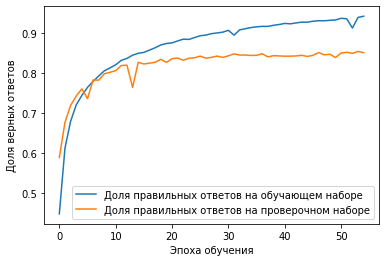

In [ ]:
#ещё раз попробуем изменить размер ядер в сверточных слоях
# и используем вместо MaxPooling2D - AveragePooling2D
batch_size = 30

model_pro2 = Sequential()
model_pro2.add(BatchNormalization(input_shape=(32,32,3)))
model_pro2.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model_pro2.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model_pro2.add(AveragePooling2D(pool_size=(2,2)))
model_pro2.add(Dropout(0.25))

model_pro2.add(BatchNormalization())
model_pro2.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model_pro2.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model_pro2.add(AveragePooling2D(pool_size=(2,2)))
model_pro2.add(Dropout(0.25))

model_pro2.add(BatchNormalization())
model_pro2.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model_pro2.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model_pro2.add(AveragePooling2D(pool_size=(2,2)))
model_pro2.add(Dropout(0.25))

model_pro2.add(BatchNormalization())
model_pro2.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model_pro2.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model_pro2.add(AveragePooling2D(pool_size=(2,2)))
model_pro2.add(Dropout(0.25))


model_pro2.add(Flatten())
model_pro2.add(Dense(1024, activation='relu'))
model_pro2.add(Dropout(0.25))
model_pro2.add(Dense(10, activation='softmax'))

model_pro2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_pro2 = model_pro2.fit(x_train10,
                              y_train10,
                              batch_size=batch_size,
                              epochs=55,
                              validation_split=0.2,
                              verbose=1)

plt.plot(history_pro2.history['accuracy'], 
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history_pro2.history['val_accuracy'], 
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()